In [1]:
from Tools.toolbox import *
from Tools.functions import *
import csv
from scipy.stats import ks_2samp
import pandas as pd

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
plt.rcParams['font.size'] = 15

In [3]:
dates_covid = []

with open('data/coviddata.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        dates_covid.append(row[2])

In [4]:
date_nums = [convert_date_to_numberC(date, dates_covid[0]) for date in dates_covid]

In [5]:
event_times = distribute(date_nums)

In [6]:
n80 = binary_search(event_times, 80)
n100 = binary_search(event_times, 100)
n165 = binary_search(event_times, 165)

In [7]:
count = Counter(date_nums)
keys_all = count.keys()
values_all = [count[key] for key in keys_all]

In [ ]:
n = binary_search(event_times, 80)
m = binary_search(event_times, 20)
paras = [5.98292175, 6.21938442, 0.5]
bnds = ((0.01, 10), (0.01, 10), (0.0001, 1))
intensity = lambda t, paras: intensity_constructor(t, paras, event_times, ExpKernel, ConstBase, depth=30)
result = MLE_de(intensity, event_times[m:n], model="constexp", bounds=bnds, maxiter=100)
optimized_params2 = result.x
print(optimized_params2)

In [14]:
paras20_80 = [6.31111014, 6.31132311, 0.05184346]

In [29]:
m = binary_search(event_times, 20)
m = binary_search(event_times, 80)
paras = paras20_80
samples = []
for _ in range(10):
    samples.append(simulate_cluster_structure(ExpKernel(*paras[:2]), ConstBase(paras[-1]), event_times[:m], 100))

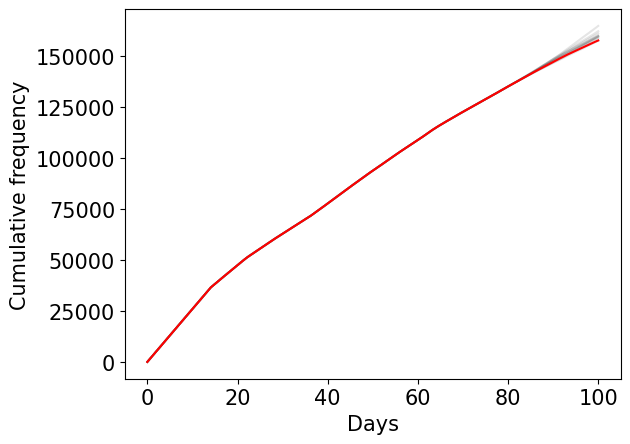

In [30]:
m = binary_search(event_times, 100)
for sample in samples:
    plt.plot(sample, range(len(sample)), color="k", alpha=0.1)
plt.plot(event_times[:m], range(m), color="r")
plt.xlabel("Days")
plt.ylabel("Cumulative frequency")
plt.show()

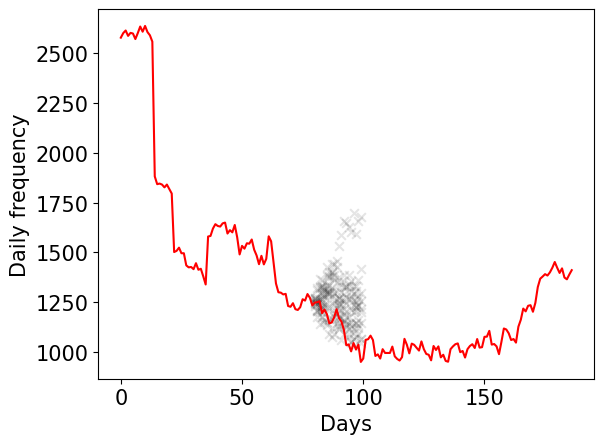

In [31]:
m = binary_search(event_times, 80)

plt.plot(keys_all, values_all, color='r')
for sample in samples:
    times = np.floor(sample[m:])
    count = Counter(times)
    keys = count.keys()
    values = [count[key] for key in keys]
    plt.scatter(keys, values, color="k", marker='x', s=40, alpha=0.1)

plt.xlabel("Days")
plt.ylabel("Daily frequency")
plt.show()

In [32]:
n80 = binary_search(event_times, 80)
n100 = binary_search(event_times, 100)

In [33]:
samples80 = [sample[n80:] for sample in samples]

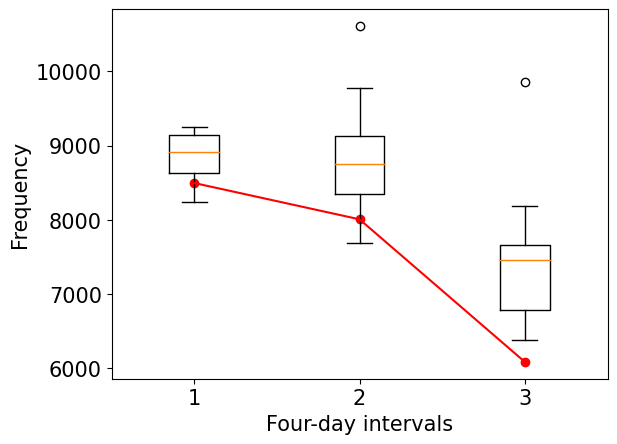

In [35]:
m = 3
data80 = [[] for _ in range(m)]
for sample in samples80:
    for i in range(m):
        data80[i].append(count_by_days(sample, m, n=4)[i])
data_a80 = count_by_days(event_times[n80:n100], m, n=4)
plt.boxplot(data80)
plt.scatter(range(1, m+1, 1), data_a80, color="r")
plt.plot(range(1, m+1, 1), data_a80, color="r")
plt.xlabel("Four-day intervals")
plt.ylabel("Frequency")
plt.show()